In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import  image
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import numpy as np
import os
import cv2 as cv

In [3]:
dir_folder = '/content/drive/MyDrive/data'
x_train = []
y_train = []
labels = []
count = 0

# tạo dữ liệu training
for i in os.listdir(dir_folder):

  path = os.path.join(dir_folder, i)
  labels.append(str(i))

  for j in os.listdir(path):

    path_img = os.path.join(path,j)
    
    img = load_img(path_img, target_size=(128,128)) 
    img = img_to_array(img)
    img = img.reshape(128,128,3) 
    img = img.astype('float32')
    img = img/255

    x_train.append(img)
    y_train.append(count)

  count += 1

  

In [4]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
y_train = np_utils.to_categorical(y_train)

print(x_train.shape, y_train.shape)

(398, 128, 128, 3) (398, 11)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=70)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(318, 128, 128, 3) (318, 11)
(80, 128, 128, 3) (80, 11)


In [6]:
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(2,2),
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same',
                 input_shape=(128,128,3),
                 strides=(1,1)))

model.add(Conv2D(filters=64,
                 kernel_size=(2,2),
                 activation='relu',
                 padding='same',
                 strides=(1,1)))

model.add(Conv2D(filters=128,
                 kernel_size=(2,2),
                 padding='same',
                 activation='relu',
                 strides=(2,2)))

model.add(Conv2D(filters=256,
                 kernel_size=(2,2),
                 padding='same',
                 activation='relu',
                 strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(512, activation='relu',input_shape=(128*128*3,), name='layer1')) 
model.add(Dropout(0.2))
model.add(Dense(1028, activation='relu', name='layer2'))
model.add(Dropout(0.2))
model.add(Dense(2056, activation='relu', name='layer3'))
model.add(Dropout(0.2))
model.add(Dense(2056, activation='relu', name='layer5'))
model.add(Dropout(0.2))
model.add(Dense(1028, activation='relu', name='layer6'))
model.add(Dropout(0.2))
model.add(Dense(11, activation='softmax', name='layer7'))

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=0.000001),metrics = ['accuracy'])               
history = model.fit(x_train, y_train, epochs=200, verbose=1)
model.save('Model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      8256      
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       32896     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 256)       131328    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 256)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 262144)            0         
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
10/10 [==============================] - 14s 193ms/step - loss: 2.4007 - accuracy: 0.0755
Epoch 2/200
10/10 [==============================] - 1s 108ms/step - loss: 2.3956 - accuracy: 0.0818
Epoch 3/200
10/10 [==============================] - 1s 107ms/step - loss: 2.3912 - accuracy: 0.1352
Epoch 4/200
10/10 [==============================] - 1s 106ms/step - loss: 2.3861 - accuracy: 0.1384
Epoch 5/200
10/10 [==============================] - 1s 108ms/step - loss: 2.3794 - accuracy: 0.1226
Epoch 6/200
10/10 [==============================] - 1s 108ms/step - loss: 2.3814 - accuracy: 0.1226
Epoch 7/200
10/10 [==============================] - 1s 107ms/step - loss: 2.3810 - accuracy: 0.0975
Epoch 8/200
10/10 [==============================] - 1s 107ms/step - loss: 2.3740 - accuracy: 0.1478
Epoch 9/200
10/10 [==============================] - 1s 108ms/step - loss: 2.3692 - accuracy: 0.1384
Epoch 10/200
10/10 [==============================] - 1s 107ms/step - loss: 2.3625 - accur



```
# Định dạng của đoạn này là mã
```

# Tiến hành nhận diện

In [7]:
model = load_model('Model.h5')

In [8]:
print(labels)

['NguyenCongPhuong', 'HaAnhTuan', 'HuongGiang', 'DongNhi', 'PhanVanDuc', 'DamVinhHung', 'TrongHoang', 'SonTungMTP', 'DenVau', 'DoanVanHau', 'AnhDuc']


In [9]:
classes = ['NguyenCongPhuong', 'HaAnhTuan', 'HuongGiang', 'DongNhi', 'PhanVanDuc', 'DamVinhHung', 'TrongHoang', 'SonTungMTP', 'DenVau', 'DoanVanHau', 'AnhDuc']

[[0.01635128 0.10449145 0.00077839 0.0028914  0.03821939 0.2661762
  0.27932903 0.09282812 0.04734404 0.08238794 0.06920279]]
Nhận diện giống với: TrongHoang ,độ chính xác là: 27.932903170585632 %


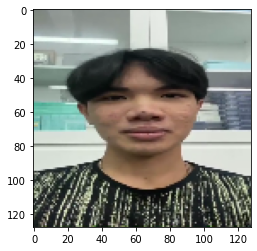

In [12]:
import matplotlib.pyplot as plt
import numpy as np
img = load_img('BanDu_0018.bmp', target_size=(128,128))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,128,128,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
percentage = y_pred.max()
percentage = percentage * 100

print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
print("Nhận diện giống với:",classes[y_classes[0]], ",độ chính xác là:",percentage, "%")